# HiGHS HIPO Analysis

Analysis of HiGHS HIPO preliminary results comparing different HiGHS variants.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

## Load Results

In [13]:
# Load HiGHS HIPO preliminary results
highs_results_file = '../infrastructure/benchmarks/runtime_optimized/highs_hipo_prelim_results.csv'
highs_results = pd.read_csv(highs_results_file)

# Load main benchmark results for comparison
main_results_file = '../main_results.csv'
main_results = pd.read_csv(main_results_file)

print(f"Loaded {len(highs_results)} HiGHS variant results")
print(f"Loaded {len(main_results)} main benchmark results")
print(f"\nHiGHS variant solvers: {sorted(highs_results['Solver'].unique())}")
print(f"\nBenchmarks in HiGHS results: {sorted([b for b in highs_results['Benchmark'].unique() if b != 'reference-benchmark'])}")

# Get matching benchmarks from main results
highs_benchmarks = highs_results[highs_results['Benchmark'] != 'reference-benchmark'][['Benchmark', 'Size']].drop_duplicates()
print(f"\n\nChecking for matching benchmarks in main results...")
for _, row in highs_benchmarks.iterrows():
    matching = main_results[(main_results['Benchmark'] == row['Benchmark']) & (main_results['Size'] == row['Size'])]
    if len(matching) > 0:
        print(f"  {row['Benchmark']}-{row['Size']}: {len(matching)} results from {sorted(matching['Solver'].unique())}")

Loaded 20 HiGHS variant results
Loaded 1425 main benchmark results

HiGHS variant solvers: ['highs', 'highs-binary', 'highs-hipo', 'highs-hipo-32', 'highs-hipo-64', 'highs-hipo-ipm']

Benchmarks in HiGHS results: ['Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332', 'pypsa-eur-elec-op', 'pypsa-eur-elec-op-ucconv']


Checking for matching benchmarks in main results...
  pypsa-eur-elec-op-ucconv-2-3h: 13 results from ['cbc', 'glpk', 'gurobi', 'highs', 'scip']
  Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h: 13 results from ['cbc', 'glpk', 'gurobi', 'highs', 'scip']
  pypsa-eur-elec-op-4-3h: 13 results from ['cbc', 'glpk', 'gurobi', 'highs', 'scip']


In [14]:
# Combine HiGHS variant results with matching benchmarks from main results
# First, get the matching benchmarks
matching_benchmarks = []
for _, row in highs_benchmarks.iterrows():
    matching = main_results[(main_results['Benchmark'] == row['Benchmark']) & (main_results['Size'] == row['Size'])]
    if len(matching) > 0:
        matching_benchmarks.append(matching)

# Combine all results
if matching_benchmarks:
    main_matching = pd.concat(matching_benchmarks, ignore_index=True)
    results = pd.concat([highs_results, main_matching], ignore_index=True)
    print(f"Combined dataset: {len(results)} total results")
    print(f"\nAll solvers in combined dataset: {sorted(results['Solver'].unique())}")
else:
    results = highs_results
    print("No matching benchmarks found in main results, using only HiGHS variant data")

# Display sample
results.head(10)

Combined dataset: 59 total results

All solvers in combined dataset: ['cbc', 'glpk', 'gurobi', 'highs', 'highs-binary', 'highs-hipo', 'highs-hipo-32', 'highs-hipo-64', 'highs-hipo-ipm', 'scip']


,Benchmark,Size,Solver,Solver Version,Solver Release Year,Status,Termination Condition,Runtime (s),Memory Usage (MB),Objective Value,Max Integrality Violation,Duality Gap,Reported Runtime (s),Timeout,Hostname,Run ID,Timestamp
0,pypsa-eur-elec-op-ucconv,2-3h,highs,1.10.0,2025.0,ok,optimal,2620.056336,4714.304,1.076516e+10,0.000000e+00,0.0001,2618.165364,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 18:58:29.409855
1,reference-benchmark,reference,highs-binary,1.10.0,NaN,OK,Optimal,181.042067,NaN,2.813304e+09,NaN,NaN,NaN,NaN,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 19:45:13.222175
2,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo,1.11.0-hipo,2025.0,ok,Optimal,1499.887785,2471.208,1.076517e+10,NaN,NaN,1499.887785,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 19:45:13.222303
3,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo-ipm,1.11.0-hipo,2025.0,ok,Optimal,1498.668607,2470.088,1.076517e+10,NaN,NaN,1498.668607,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 20:10:13.831061
4,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo-32,1.11.0-hipo,2025.0,ok,Optimal,1500.080767,2465.348,1.076517e+10,NaN,NaN,1500.080767,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 20:35:12.912126
5,reference-benchmark,reference,highs-binary,1.10.0,NaN,OK,Optimal,180.758704,NaN,2.813304e+09,NaN,NaN,NaN,NaN,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 21:03:14.163928
6,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo-64,1.11.0-hipo,2025.0,ok,Optimal,1495.810838,2466.464,1.076517e+10,NaN,NaN,1495.810838,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 21:03:14.164049
7,Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon2...,1-1h,highs,1.10.0,2025.0,ok,optimal,3022.784890,1021.224,8.922978e+05,1.865175e-14,0.0001,3022.573616,3600.0,benchmark-instance-highs-prelim-test-01,20251010_185429_benchmark-instance-highs-preli...,2025-10-10 18:59:42.273848
8,reference-benchmark,reference,highs-binary,1.10.0,NaN,OK,Optimal,232.219908,NaN,2.813304e+09,NaN,NaN,NaN,NaN,benchmark-instance-highs-prelim-test-01,20251010_185429_benchmark-instance-highs-preli...,2025-10-10 19:53:58.008965
9,Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon2...,1-1h,highs-hipo,1.11.0-hipo,2025.0,ok,Optimal,1441.530234,896.220,8.922978e+05,NaN,NaN,1441.530234,3600.0,benchmark-instance-highs-prelim-test-01,20251010_185429_benchmark-instance-highs-preli...,2025-10-10 19:53:58.009106


## Data Preparation

In [15]:
# Create benchmark-size identifier
results['bench-size'] = results['Benchmark'] + '-' + results['Size']

# Filter out reference benchmarks for main analysis
actual_results = results[results['Benchmark'] != 'reference-benchmark'].copy()

print(f"\nActual benchmark results: {len(actual_results)}")
print(f"Reference benchmark results: {len(results) - len(actual_results)}")


Actual benchmark results: 54
Reference benchmark results: 5


## Performance Comparison

In [16]:
# Group by benchmark and solver, showing runtime statistics
perf_summary = actual_results.groupby(['bench-size', 'Solver']).agg({
    'Runtime (s)': ['mean', 'std', 'min', 'max', 'count'],
    'Memory Usage (MB)': 'mean',
    'Status': lambda x: (x == 'ok').sum()
}).round(2)

perf_summary.columns = ['_'.join(col).strip() for col in perf_summary.columns.values]
perf_summary = perf_summary.rename(columns={'Status_<lambda>': 'Success_count'})
print(perf_summary)

                                                                   Runtime (s)_mean  \
bench-size                                         Solver                             
Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24... cbc                      3600.00   
                                                   glpk                     3600.00   
                                                   gurobi                     84.41   
                                                   highs                    2220.20   
                                                   highs-hipo               1441.53   
                                                   highs-hipo-32            1429.22   
                                                   highs-hipo-64            1439.92   
                                                   highs-hipo-ipm           1419.04   
                                                   scip                     1776.12   
pypsa-eur-elec-op-4-3h                     

## Runtime Comparison Plots

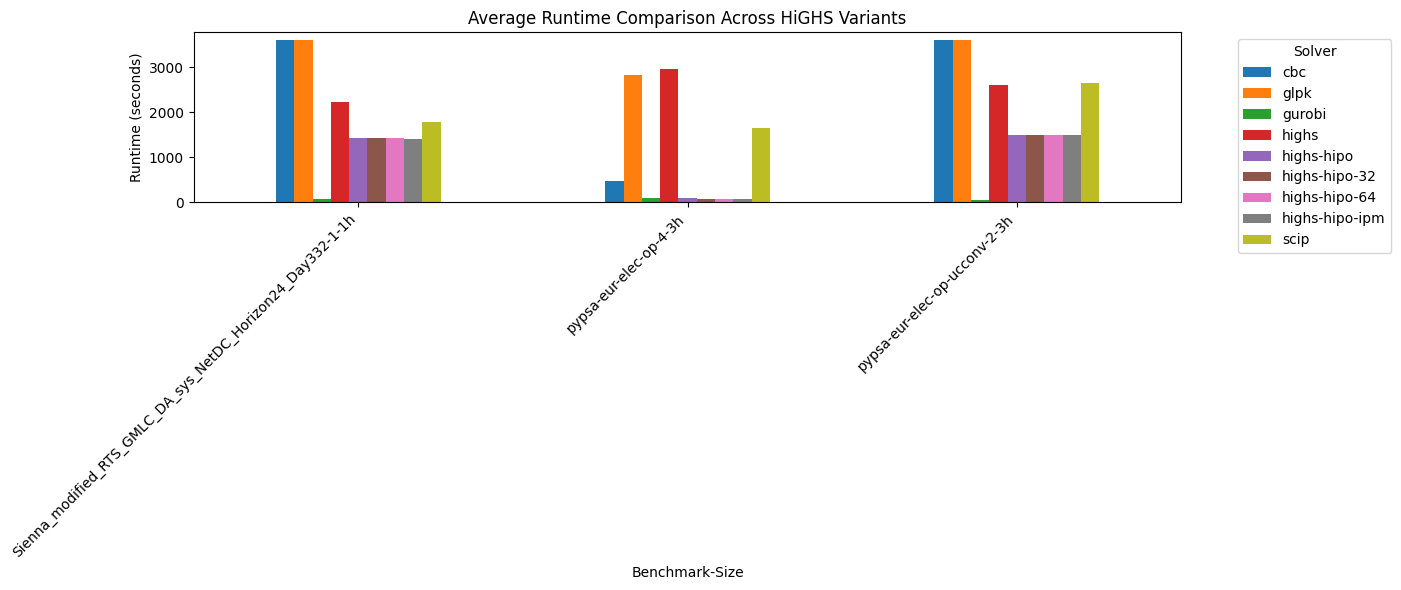

In [17]:
# Bar chart comparing average runtimes across solvers for each benchmark
pivot_runtime = actual_results.pivot_table(
    index='bench-size',
    columns='Solver',
    values='Runtime (s)',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(14, 6))
pivot_runtime.plot(kind='bar', ax=ax)
ax.set_ylabel('Runtime (seconds)')
ax.set_xlabel('Benchmark-Size')
ax.set_title('Average Runtime Comparison Across HiGHS Variants')
ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

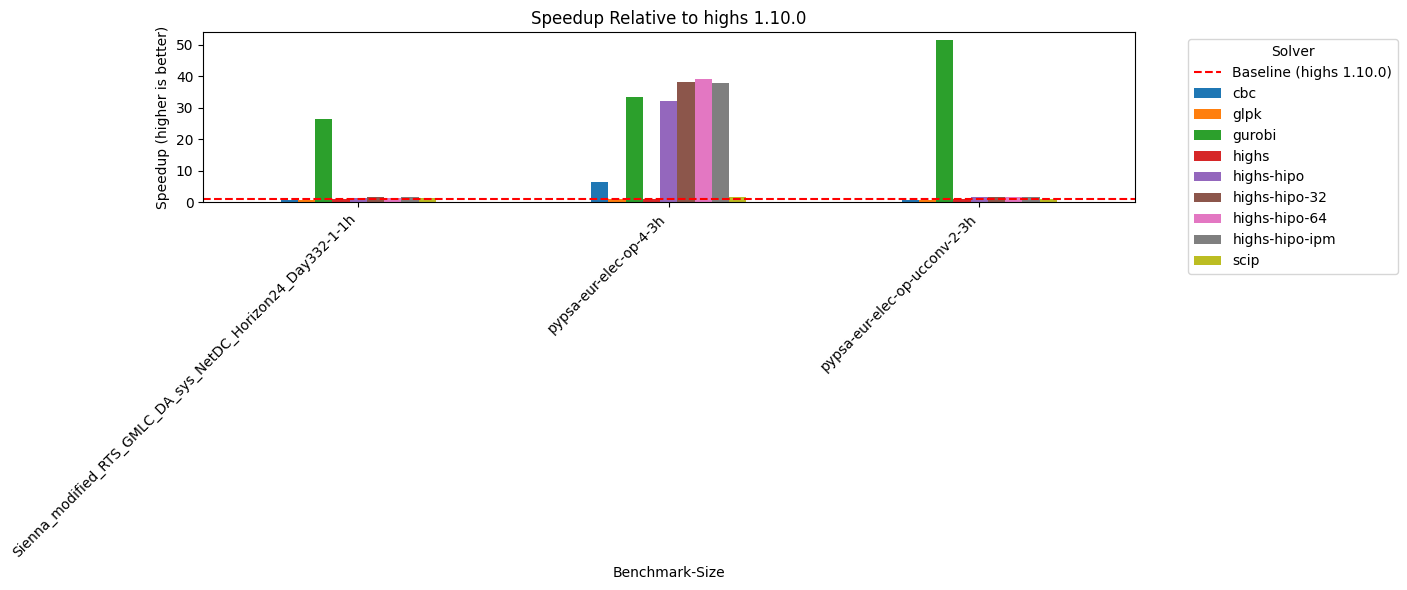

In [18]:
# Speedup comparison: normalize to baseline highs 1.10.0
baseline_solver = 'highs'

# Get baseline runtimes
baseline_runtimes = actual_results[actual_results['Solver'] == baseline_solver].groupby('bench-size')['Runtime (s)'].mean()

# Calculate speedups
speedup_data = []
for bench in actual_results['bench-size'].unique():
    if bench not in baseline_runtimes.index:
        continue
    baseline = baseline_runtimes[bench]

    for solver in actual_results['Solver'].unique():
        solver_results = actual_results[
            (actual_results['bench-size'] == bench) &
            (actual_results['Solver'] == solver)
        ]
        if len(solver_results) > 0:
            avg_runtime = solver_results['Runtime (s)'].mean()
            speedup = baseline / avg_runtime
            speedup_data.append({
                'Benchmark': bench,
                'Solver': solver,
                'Speedup': speedup
            })

speedup_df = pd.DataFrame(speedup_data)

# Plot speedups
pivot_speedup = speedup_df.pivot(index='Benchmark', columns='Solver', values='Speedup')

fig, ax = plt.subplots(figsize=(14, 6))
pivot_speedup.plot(kind='bar', ax=ax)
ax.axhline(y=1.0, color='red', linestyle='--', label='Baseline (highs 1.10.0)')
ax.set_ylabel('Speedup (higher is better)')
ax.set_xlabel('Benchmark-Size')
ax.set_title(f'Speedup Relative to {baseline_solver} 1.10.0')
ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Memory Usage Comparison

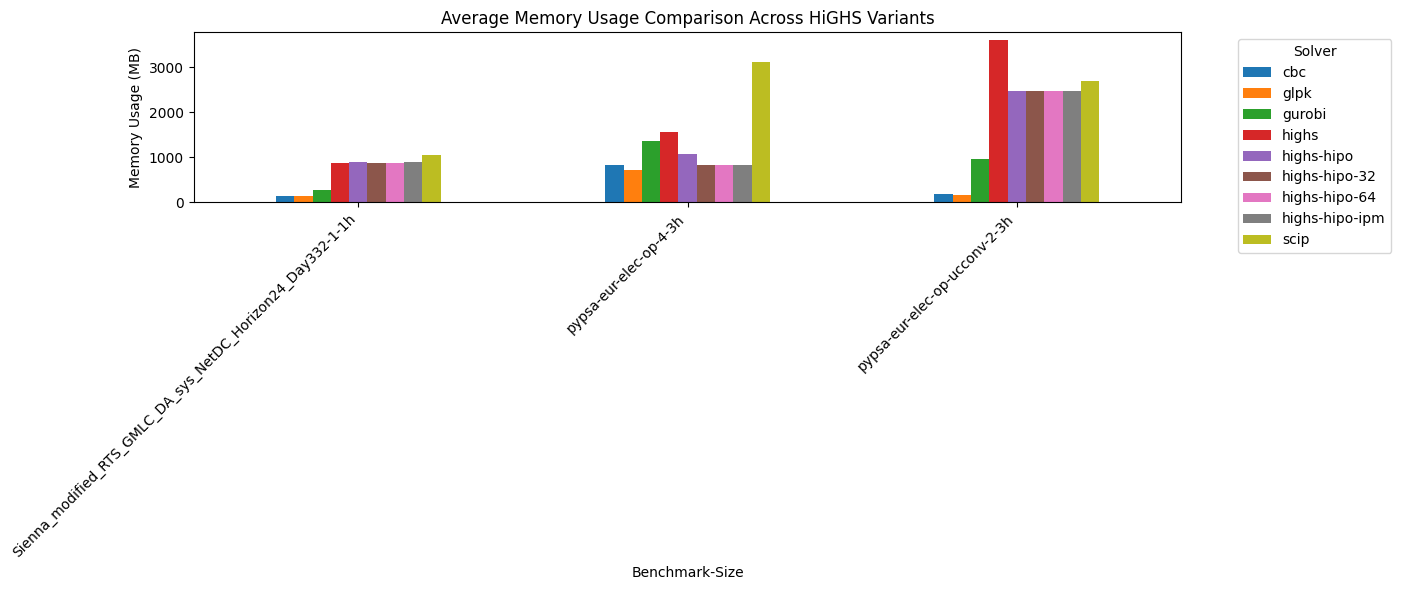

In [19]:
# Memory usage comparison
pivot_memory = actual_results.pivot_table(
    index='bench-size',
    columns='Solver',
    values='Memory Usage (MB)',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(14, 6))
pivot_memory.plot(kind='bar', ax=ax)
ax.set_ylabel('Memory Usage (MB)')
ax.set_xlabel('Benchmark-Size')
ax.set_title('Average Memory Usage Comparison Across HiGHS Variants')
ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Comparison with Other Solvers (CBC, GLPK, Gurobi, SCIP)

In [20]:
# Compare all solvers including other solver families
# Filter to only include the benchmarks we tested HiGHS variants on
other_solver_data = actual_results[~actual_results['Solver'].str.startswith('highs')].copy()

if len(other_solver_data) > 0:
    print(f"Found {len(other_solver_data)} results from other solvers")
    print(f"Other solvers: {sorted(other_solver_data['Solver'].unique())}")

    # Create comparison table
    all_solver_summary = actual_results.groupby(['bench-size', 'Solver']).agg({
        'Runtime (s)': 'mean',
        'Memory Usage (MB)': 'mean',
        'Status': lambda x: (x == 'ok').sum()
    }).round(2)

    print("\nRuntime comparison across all solvers:")
    runtime_pivot = all_solver_summary['Runtime (s)'].unstack(fill_value=float('inf'))
    print(runtime_pivot.to_string())
else:
    print("No other solver data available for comparison")

Found 27 results from other solvers
Other solvers: ['cbc', 'glpk', 'gurobi', 'scip']

Runtime comparison across all solvers:
Solver                                                           cbc     glpk  gurobi    highs  highs-hipo  highs-hipo-32  highs-hipo-64  highs-hipo-ipm     scip
bench-size                                                                                                                                                       
Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h  3600.00  3600.00   84.41  2220.20     1441.53        1429.22        1439.92         1419.04  1776.12
pypsa-eur-elec-op-4-3h                                        466.66  2820.99   89.09  2962.73       91.83          77.43          75.90           78.39  1656.37
pypsa-eur-elec-op-ucconv-2-3h                                3600.00  3600.00   51.03  2619.38     1499.89        1500.08        1495.81         1498.67  2656.08


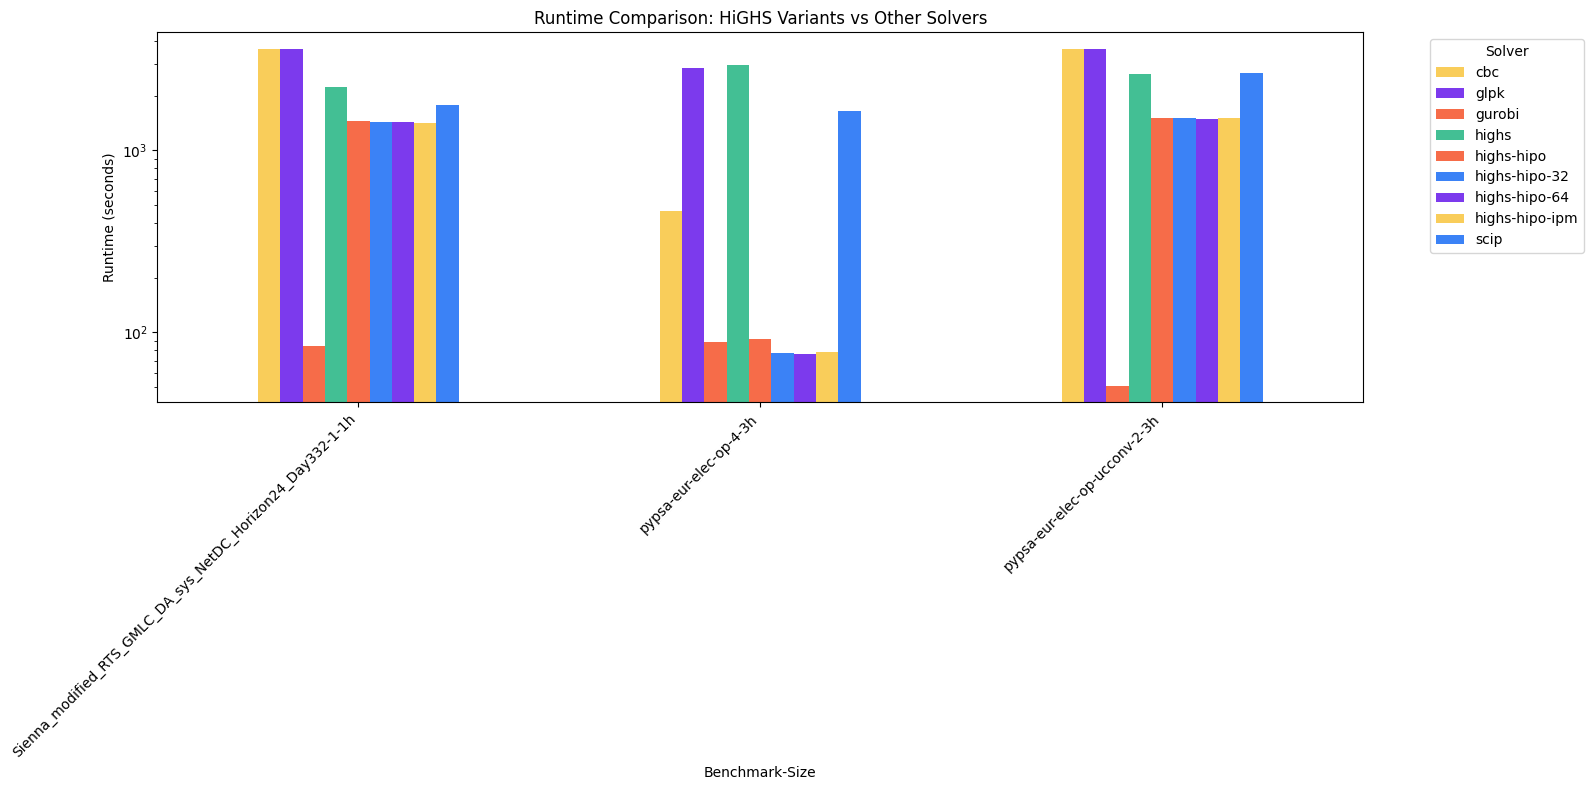

In [ ]:
# Plot runtime comparison: HiGHS variants vs other solvers
if len(other_solver_data) > 0:
    # Define color map for all solvers
    color_map_all = {
        'highs': '#43BF94',  # green - baseline
        'highs-binary': '#2D8A63',  # darker green
        'highs-hipo': '#F66C49',  # red/orange
        'highs-hipo-ipm': '#F9CD5A',  # yellow
        'highs-hipo-32': '#3B82F6',  # blue
        'highs-hipo-64': '#7C3AED',  # purple
        'cbc': '#F9CD5A',  # yellow
        'glpk': '#7C3AED',  # purple
        'gurobi': '#F66C49',  # red
        'scip': '#3B82F6',  # blue
    }

    pivot_all = actual_results.pivot_table(
        index='bench-size',
        columns='Solver',
        values='Runtime (s)',
        aggfunc='mean'
    )

    fig, ax = plt.subplots(figsize=(16, 8))
    pivot_all.plot(kind='bar', ax=ax, color=[color_map_all.get(s, '#888888') for s in pivot_all.columns])
    ax.set_ylabel('Runtime (seconds)')
    ax.set_xlabel('Benchmark-Size')
    ax.set_title('Runtime Comparison: HiGHS Variants vs Other Solvers')
    ax.set_yscale('log')  # Log scale to better show differences
    ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No other solver data to plot")

In [ ]:
# Speedup comparison: Best HiGHS variant vs other solvers
if len(other_solver_data) > 0:
    print("Speedup Analysis: Best HiGHS Variant vs Other Solvers\n")

    for bench in actual_results['bench-size'].unique():
        bench_data = actual_results[actual_results['bench-size'] == bench]

        # Find best HiGHS variant
        highs_variants = bench_data[bench_data['Solver'].str.startswith('highs')]
        if len(highs_variants) > 0:
            best_highs = highs_variants.loc[highs_variants['Runtime (s)'].idxmin()]
            best_highs_time = best_highs['Runtime (s)']

            print(f"\n{bench}:")
            print(f"  Best HiGHS variant: {best_highs['Solver']} ({best_highs_time:.2f}s)")

            # Compare with other solvers
            other_solvers = bench_data[~bench_data['Solver'].str.startswith('highs')]
            if len(other_solvers) > 0:
                for _, row in other_solvers.iterrows():
                    speedup = row['Runtime (s)'] / best_highs_time
                    status_str = "" if row['Status'] == 'ok' else f" [{row['Status']}]"
                    print(f"    vs {row['Solver']}: {speedup:.2f}x slower{status_str}")
            else:
                print("    No other solvers to compare")
else:
    print("No other solver data available for comparison")

Speedup Analysis: Best HiGHS Variant vs Other Solvers


pypsa-eur-elec-op-ucconv-2-3h:
  Best HiGHS variant: highs-hipo-64 (1495.81s)
    vs glpk: 2.41x slower [TO]
    vs scip: 2.41x slower [TO]
    vs gurobi: 0.05x slower
    vs scip: 2.41x slower [TO]
    vs cbc: 2.41x slower [TO]
    vs gurobi: 0.03x slower
    vs cbc: 2.41x slower [TO]
    vs gurobi: 0.02x slower
    vs scip: 0.51x slower

Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h:
  Best HiGHS variant: highs (1381.56s)
    vs glpk: 2.61x slower [TO]
    vs scip: 0.72x slower
    vs gurobi: 0.03x slower
    vs scip: 1.84x slower
    vs cbc: 2.61x slower [TO]
    vs gurobi: 0.06x slower
    vs cbc: 2.61x slower [TO]
    vs gurobi: 0.09x slower
    vs scip: 1.29x slower

pypsa-eur-elec-op-4-3h:
  Best HiGHS variant: highs-hipo-64 (75.90s)
    vs glpk: 37.17x slower
    vs scip: 24.41x slower
    vs gurobi: 0.93x slower
    vs scip: 24.03x slower
    vs cbc: 6.12x slower
    vs gurobi: 1.11x slower
    vs cbc: 6.18x

## Result Validation and Quality Checks

In [23]:
# Check if reported and measured runtimes are similar
print("Reported vs Measured Runtime Comparison:\n")

runtime_comp = actual_results[
    (actual_results['Status'] == 'ok') &
    (~actual_results['Reported Runtime (s)'].isna())
].copy()

if len(runtime_comp) > 0:
    runtime_comp['Runtime Diff'] = (runtime_comp['Runtime (s)'] - runtime_comp['Reported Runtime (s)']).abs()
    runtime_comp['Runtime Diff %'] = (runtime_comp['Runtime Diff'] / runtime_comp['Reported Runtime (s)']) * 100

    print(f"Results with reported runtime: {len(runtime_comp)}")
    print(f"\nRuntime difference statistics:")
    print(runtime_comp['Runtime Diff %'].describe())

    # Show largest differences
    print(f"\nTop 5 largest runtime differences:")
    top_diffs = runtime_comp.nlargest(5, 'Runtime Diff %')[
        ['bench-size', 'Solver', 'Runtime (s)', 'Reported Runtime (s)', 'Runtime Diff %']
    ]
    print(top_diffs.to_string(index=False))

    # Check if any have >5% difference
    high_diff = runtime_comp[runtime_comp['Runtime Diff %'] > 5.0]
    if len(high_diff) > 0:
        print(f"\n⚠ WARNING: {len(high_diff)} results with >5% difference between measured and reported runtime")
    else:
        print("\n✓ All runtime measurements are consistent (<5% difference)")
else:
    print("No reported runtime data available for comparison")

Reported vs Measured Runtime Comparison:

Results with reported runtime: 43

Runtime difference statistics:
count    43.000000
mean      0.555462
std       1.289687
min       0.000000
25%       0.000000
50%       0.072024
75%       0.175123
max       5.521495
Name: Runtime Diff %, dtype: float64

Top 5 largest runtime differences:
                   bench-size Solver  Runtime (s)  Reported Runtime (s)  Runtime Diff %
       pypsa-eur-elec-op-4-3h gurobi    70.758566             67.056068        5.521495
pypsa-eur-elec-op-ucconv-2-3h gurobi    28.325743             27.085440        4.579223
       pypsa-eur-elec-op-4-3h gurobi    83.892357             80.986206        3.588452
pypsa-eur-elec-op-ucconv-2-3h gurobi    45.689812             44.466563        2.750941
       pypsa-eur-elec-op-4-3h gurobi   112.614586            109.702044        2.654957

⚠ WARNING: 1 results with >5% difference between measured and reported runtime


In [24]:
# Check for high maximum integrality violations
print("Integrality Violation Analysis:\n")

integrality_data = actual_results[~actual_results['Max Integrality Violation'].isna()].copy()
if len(integrality_data) > 0:
    print(f"Results with integrality violation data: {len(integrality_data)}")
    print(f"\nIntegrality violation statistics:")
    print(integrality_data['Max Integrality Violation'].describe())

    high_violation = integrality_data[integrality_data['Max Integrality Violation'] > 1e-6]
    if len(high_violation) > 0:
        print(f"\n⚠ WARNING: {len(high_violation)} results with max integrality violation > 1e-6:")
        print(high_violation[['bench-size', 'Solver', 'Max Integrality Violation']].sort_values('Max Integrality Violation', ascending=False))
    else:
        print("\n✓ All integrality violations are within acceptable range (< 1e-6)")
else:
    print("No integrality violation data available")

Integrality Violation Analysis:

Results with integrality violation data: 10

Integrality violation statistics:
count    1.000000e+01
mean     1.238216e-09
std      3.915568e-09
min      0.000000e+00
25%      0.000000e+00
50%      1.887379e-15
75%      1.548761e-14
max      1.238212e-08
Name: Max Integrality Violation, dtype: float64

✓ All integrality violations are within acceptable range (< 1e-6)


In [25]:
# Check for high duality gaps (above 1e-4)
print("Duality Gap Analysis:\n")

duality_gap_data = actual_results[~actual_results['Duality Gap'].isna()].copy()
if len(duality_gap_data) > 0:
    print(f"Results with duality gap data: {len(duality_gap_data)}")
    print(f"\nDuality gap statistics:")
    print(duality_gap_data['Duality Gap'].describe())

    high_gap = duality_gap_data[duality_gap_data['Duality Gap'] > 1e-4]
    if len(high_gap) > 0:
        print(f"\n⚠ WARNING: {len(high_gap)} results with duality gap > 1e-4:")
        print(high_gap[['bench-size', 'Solver', 'Duality Gap']].sort_values('Duality Gap', ascending=False))
    else:
        print("\n✓ All duality gaps are within acceptable range (< 1e-4)")
else:
    print("No duality gap data available")

Duality Gap Analysis:

Results with duality gap data: 10

Duality gap statistics:
count    10.000000
mean      0.000085
std       0.000033
min       0.000000
25%       0.000098
50%       0.000099
75%       0.000100
max       0.000100
Name: Duality Gap, dtype: float64

✓ All duality gaps are within acceptable range (< 1e-4)


In [26]:
# Check that all solvers report similar objective values for the same benchmark
print("Objective Value Consistency Check:\n")

for bench in actual_results['bench-size'].unique():
    bench_data = actual_results[
        (actual_results['bench-size'] == bench) &
        (~actual_results['Objective Value'].isna())
    ]

    if len(bench_data) > 0:
        obj_values = bench_data['Objective Value']
        obj_min = obj_values.min()
        obj_max = obj_values.max()
        obj_std = obj_values.std()
        obj_std_ratio = obj_std / obj_min if obj_min != 0 else 0

        print(f"\n{bench}:")
        print(f"  Min: {obj_min:.6e}, Max: {obj_max:.6e}")
        print(f"  Std Dev: {obj_std:.6e}, Std/Min ratio: {obj_std_ratio:.6e}")

        if obj_std_ratio > 1e-4:
            print(f"  ⚠ WARNING: High variation in objective values!")
            print(bench_data[['Solver', 'Objective Value']])
        else:
            print(f"  ✓ Good agreement (std/min < 1e-4)")

Objective Value Consistency Check:


pypsa-eur-elec-op-ucconv-2-3h:
  Min: 1.076509e+10, Max: 1.076541e+10
  Std Dev: 7.229455e+04, Std/Min ratio: 6.715651e-06
  ✓ Good agreement (std/min < 1e-4)

Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h:
  Min: 8.922978e+05, Max: 8.922978e+05
  Std Dev: 2.915217e-04, Std/Min ratio: 3.267090e-10
  ✓ Good agreement (std/min < 1e-4)

pypsa-eur-elec-op-4-3h:
  Min: 8.630161e+09, Max: 8.630161e+09
  Std Dev: 1.186269e+00, Std/Min ratio: 1.374562e-10
  ✓ Good agreement (std/min < 1e-4)


## Detailed Benchmark-by-Benchmark Comparison

In [27]:
# For each benchmark, show detailed comparison
for bench in actual_results['bench-size'].unique():
    bench_data = actual_results[actual_results['bench-size'] == bench]

    print(f"\n{'='*80}")
    print(f"Benchmark: {bench}")
    print(f"{'='*80}")

    summary = bench_data.groupby('Solver').agg({
        'Runtime (s)': ['mean', 'std'],
        'Memory Usage (MB)': 'mean',
        'Status': lambda x: list(x)
    }).round(2)

    print(summary)
    print()


Benchmark: pypsa-eur-elec-op-ucconv-2-3h
               Runtime (s)          Memory Usage (MB)                Status
                      mean      std              mean              <lambda>
Solver                                                                     
cbc                3600.00     0.00            182.09              [TO, TO]
glpk               3600.00      NaN            172.79                  [TO]
gurobi               51.03    25.79            961.28          [ok, ok, ok]
highs              2619.38   196.52           3598.88  [ok, ok, ok, ok, ok]
highs-hipo         1499.89      NaN           2471.21                  [ok]
highs-hipo-32      1500.08      NaN           2465.35                  [ok]
highs-hipo-64      1495.81      NaN           2466.46                  [ok]
highs-hipo-ipm     1498.67      NaN           2470.09                  [ok]
scip               2656.08  1634.92           2700.47          [TO, TO, ok]


Benchmark: Sienna_modified_RTS_GMLC_DA_sys_N

## Reference Benchmark Analysis

Reference benchmark runs: 5

Runtime statistics:
count      5.000000
mean     198.627852
std       24.101481
min      180.758704
25%      181.042067
50%      182.754563
75%      216.364019
max      232.219908
Name: Runtime (s), dtype: float64


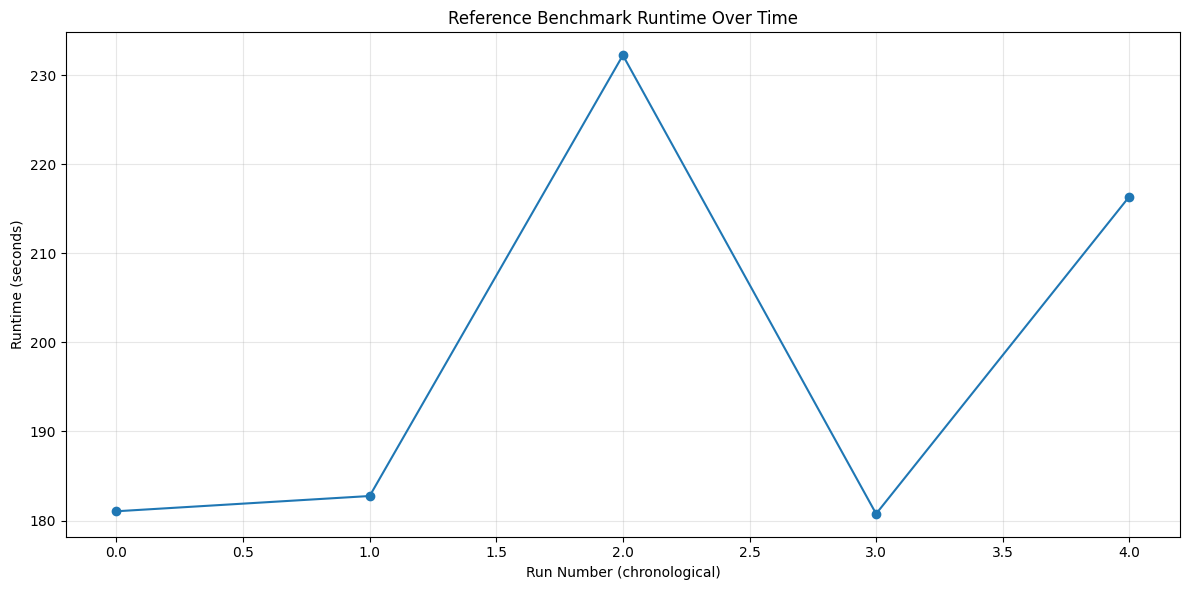

In [28]:
# Analyze reference benchmark runs to check consistency
reference_results = results[results['Benchmark'] == 'reference-benchmark'].copy()

if len(reference_results) > 0:
    print(f"Reference benchmark runs: {len(reference_results)}")
    print(f"\nRuntime statistics:")
    print(reference_results['Runtime (s)'].describe())

    # Plot reference benchmark runtimes over time
    fig, ax = plt.subplots(figsize=(12, 6))
    reference_results_sorted = reference_results.sort_values('Timestamp')
    ax.plot(range(len(reference_results_sorted)), reference_results_sorted['Runtime (s)'], 'o-')
    ax.set_xlabel('Run Number (chronological)')
    ax.set_ylabel('Runtime (seconds)')
    ax.set_title('Reference Benchmark Runtime Over Time')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No reference benchmark results found.")

## Summary Statistics

In [29]:
# Overall summary by solver
overall_summary = actual_results.groupby('Solver').agg({
    'Runtime (s)': ['mean', 'median', 'std'],
    'Memory Usage (MB)': ['mean', 'median'],
    'Status': lambda x: f"{(x == 'ok').sum()}/{len(x)}"
}).round(2)

print("\n" + "="*80)
print("OVERALL SUMMARY BY SOLVER")
print("="*80)
print(overall_summary)


OVERALL SUMMARY BY SOLVER
               Runtime (s)                   Memory Usage (MB)           \
                      mean   median      std              mean   median   
Solver                                                                    
cbc                2555.55  3600.00  1618.05            388.06   182.09   
glpk               3340.33  3600.00   449.76            343.26   172.79   
gurobi               74.84    79.07    32.45            864.70   982.19   
highs              2600.77  2661.70   558.61           2014.09  1540.66   
highs-hipo         1011.08  1441.53   796.63           1482.19  1079.16   
highs-hipo-32      1002.24  1429.22   801.69           1391.33   880.93   
highs-hipo-64      1003.88  1439.92   804.14           1389.16   880.41   
highs-hipo-ipm      998.70  1419.04   798.01           1394.03   891.14   
scip               2029.52  1823.90  1032.75           2287.14  2787.74   

                 Status  
               <lambda>  
Solver              

In [30]:
# Export summary to CSV
output_file = 'highs_hipo_analysis_summary.csv'
perf_summary.to_csv(output_file)
print(f"\nSummary exported to: {output_file}")


Summary exported to: highs_hipo_analysis_summary.csv
